# VGG16 이전학습 fine-tuning

## 개 고양이 데이터 불러오기

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir='C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 6장 CNN의 응용과 이전학습/dogs and cats_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test') 
imagegen=ImageDataGenerator(rescale=1./255)
train_batches=imagegen.flow_from_directory(train_dir, target_size=(150,150),batch_size=20,class_mode='binary')
valid_batches=imagegen.flow_from_directory(validation_dir, target_size=(150,150),batch_size=20,class_mode='binary')
test_batches=imagegen.flow_from_directory(test_dir, target_size=(150,150),batch_size=20,class_mode='binary', shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## VGG16 모델

In [4]:
from tensorflow.keras.applications import VGG16
vgg16_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(300, 300,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

## fine-tuning

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras import optimizers

vgg_base=VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3)) # 픽셀 크기를 (150,150)으로 줄임

for layer in vgg_base.layers:
    layer.trainable=False # 모수를 추정하지 않고 추정된 모수 사용
  
last_layer=vgg_base.get_layer('block5_pool')
last_output=last_layer.output
x=Flatten()(last_output)
x=Dense(64, activation='relu',name='FC_2')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(1, activation='sigmoid',name='output')(x)

model1=Model(inputs=vgg_base.input, outputs=x)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [3]:
model1.compile(optimizer=optimizers.RMSprop(lr=1e-5),loss='binary_crossentropy',metrics=['acc'])
model1_result=model1.fit(train_batches,steps_per_epoch=100,validation_data=valid_batches, validation_steps=50, epochs=10)

Epoch 1/10
100/100 [==============================] - 156s 2s/step - loss: 0.8831 - acc: 0.5307 - val_loss: 0.5902 - val_acc: 0.6900
Epoch 2/10
100/100 [==============================] - 186s 2s/step - loss: 0.6549 - acc: 0.6758 - val_loss: 0.4874 - val_acc: 0.7770
Epoch 3/10
100/100 [==============================] - 183s 2s/step - loss: 0.5621 - acc: 0.7095 - val_loss: 0.4212 - val_acc: 0.8150
Epoch 4/10
100/100 [==============================] - 185s 2s/step - loss: 0.4675 - acc: 0.7805 - val_loss: 0.3809 - val_acc: 0.8340
Epoch 5/10
100/100 [==============================] - 181s 2s/step - loss: 0.4326 - acc: 0.7895 - val_loss: 0.3567 - val_acc: 0.8470
Epoch 6/10
100/100 [==============================] - 183s 2s/step - loss: 0.4264 - acc: 0.8028 - val_loss: 0.3383 - val_acc: 0.8570
Epoch 7/10
100/100 [==============================] - 175s 2s/step - loss: 0.4273 - acc: 0.8045 - val_loss: 0.3324 - val_acc: 0.8560
Epoch 8/10
100/100 [==============================] - 178s 2s/step - 

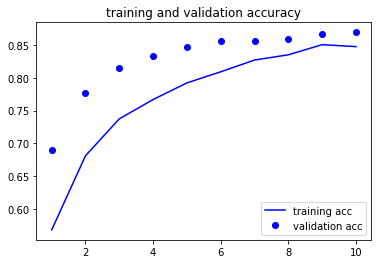

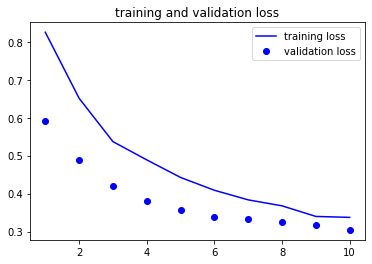

In [4]:
import matplotlib.pyplot as plt
acc=model1_result.history['acc']
val_acc=model1_result.history['val_acc']
loss=model1_result.history['loss']
val_loss=model1_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [9]:
vgg_base.trainable=False

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40, width_shift_range=0.2,
                               height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255) #검증데이터는 자료증대를 하지 않아야 함.
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')

vgg_base=VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))  

for layer in vgg_base.layers:
    layer.trainable=False
  
last_layer=vgg_base.get_layer('block5_pool')
last_output=last_layer.output
x=MaxPooling2D(2)(last_output)
x=Flatten()(x)
x=Dense(256, activation='relu',name='FC_2')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(1, activation='sigmoid',name='output')(x)

model_aug=Model(inputs=vgg_base.input, outputs=x)
model_aug.summary()


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________

In [10]:
model_aug.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
model_aug_result=model_aug.fit(train_generator,steps_per_epoch=100, epochs=30,
                               validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 165s 2s/step - loss: 0.8880 - acc: 0.5612 - val_loss: 0.5998 - val_acc: 0.6320
Epoch 2/30
100/100 [==============================] - 207s 2s/step - loss: 0.6760 - acc: 0.6705 - val_loss: 0.4707 - val_acc: 0.7850
Epoch 3/30
100/100 [==============================] - 198s 2s/step - loss: 0.6583 - acc: 0.6811 - val_loss: 0.4073 - val_acc: 0.8180
Epoch 4/30
100/100 [==============================] - 196s 2s/step - loss: 0.5883 - acc: 0.7193 - val_loss: 0.3796 - val_acc: 0.8290
Epoch 5/30
100/100 [==============================] - 194s 2s/step - loss: 0.5661 - acc: 0.7383 - val_loss: 0.3601 - val_acc: 0.8380
Epoch 6/30
100/100 [==============================] - 194s 2s/step - loss: 0.5321 - acc: 0.7611 - val_loss: 0.3446 - val_acc: 0.8410
Epoch 7/30
100/100 [==============================] - 194s 2s/step - loss: 0.5558 - acc: 0.7485 - val_loss: 0.3390 - val_acc: 0.8510
Epoch 8/30
100/100 [==============================] - 194s 2s/step - 

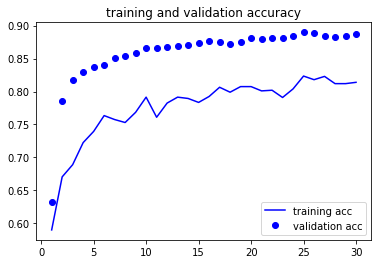

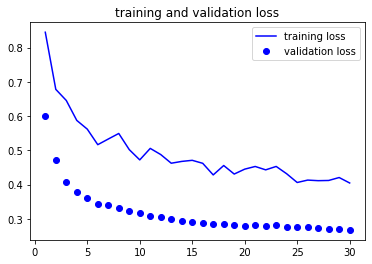

In [11]:
import matplotlib.pyplot as plt
acc=model_aug_result.history['acc']
val_acc=model_aug_result.history['val_acc']
loss=model_aug_result.history['loss']
val_loss=model_aug_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

## Pooling을 avg

In [17]:
# 모수 줄이기 위해 flatten 대신 pooling='avg' 사용
# flatten 사용하면 모수가 너무 많아져 오버피팅이 발생 그래서 요즘은 global_average_pooling 사용
base_model=VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3),pooling='avg')  

for layer in base_model.layers[:-5]:
    layer.trainable=False
  
last_output=base_model.output
x=Dense(256, activation='relu',name='FC_2')(last_output)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(1, activation='sigmoid',name='output')(x)

model_aug=Model(inputs=base_model.input, outputs=x)
model_aug.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [18]:
from tensorflow.keras import optimizers
model_aug.compile(optimizer=optimizers.RMSprop(lr=1e-5),loss='binary_crossentropy',metrics=['acc'])
result_final=model_aug.fit(train_generator,steps_per_epoch=100, epochs=30, 
                           validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 202s 2s/step - loss: 0.6849 - acc: 0.6161 - val_loss: 0.4957 - val_acc: 0.8490
Epoch 2/30
100/100 [==============================] - 232s 2s/step - loss: 0.4899 - acc: 0.7732 - val_loss: 0.3638 - val_acc: 0.8770
Epoch 3/30
100/100 [==============================] - 224s 2s/step - loss: 0.4041 - acc: 0.8168 - val_loss: 0.2714 - val_acc: 0.8910
Epoch 4/30
100/100 [==============================] - 230s 2s/step - loss: 0.3580 - acc: 0.8428 - val_loss: 0.2485 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 242s 2s/step - loss: 0.3184 - acc: 0.8667 - val_loss: 0.2222 - val_acc: 0.9030
Epoch 6/30
100/100 [==============================] - 223s 2s/step - loss: 0.3024 - acc: 0.8757 - val_loss: 0.2241 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 235s 2s/step - loss: 0.3017 - acc: 0.8681 - val_loss: 0.2086 - val_acc: 0.9000
Epoch 8/30
100/100 [==============================] - 239s 2s/step - 

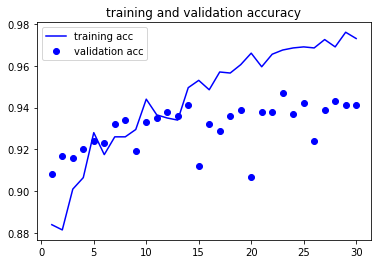

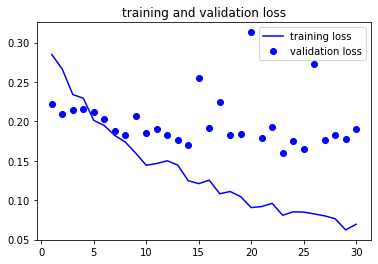

In [17]:
import matplotlib.pyplot as plt
acc=result_final.history['acc']
val_acc=result_final.history['val_acc']
loss=result_final.history['loss']
val_loss=result_final.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
loss, acc=model_aug.evaluate(test_generator,steps=50)
print(loss)
print(acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 43s 864ms/step - loss: 0.2210 - acc: 0.9330
0.22099395096302032
0.9330000281333923
